<a href="https://colab.research.google.com/github/mungaimoureen/IP-Financial-inclusion/blob/main/Independent_project_Financial_Inclusion_Moureen_Mungai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Defining the Research Questions


> We are going to predict what individuals are most likely to have or use a bank account.


# Defining the Metric for Success

>The success of this project is hinged on the fact that we are able to conduct univariate and multivariate analysis that will give insights to predict what people are most likely to have and use a bank account.

# Understanding the Research Context

>Financial inclusion means that individuals and businesses have access to useful and affordable financial products and services(central bank,2022). Financial products and services are numerous. However having a bank account opens you up to financial possibilities not only for your day to day operations but also when in need in times of emergency and also funding your future through your savings.
Therefore when we conduct this analysis we are a step closer to establish financial inclusion when we determine the metrics that qualify you to have a bank and use account. 

# The Experimental Design

> Steps.


>*   Load data and preview the data sets
>*   Data Cleaning, outliers anomalies...
>*   Univariate Analysis
>*   Bivariate Analysis
>*   Multivariate Analysis
>*   Implementing the Solution
>*   Challenging the Solution 



# Data Relevance

>We are using dataset from the fintech surveys conducted between 2016 and 2018 for East African countries on Age, Marital status, Gender, Occupation, Owneship of bank accounts. All these field give relevance to the data for they are key factors and characteristics to reduce a prediction for one to have an account.

# Reading the Data

In [77]:
# Importing relevant python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
# Loading the data from the source (csv file)

#Dataset Url: http://bit.ly/FinancialDataset

bank = pd.read_csv('http://bit.ly/FinancialDataset')
bank

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


# Checking the Data

In [75]:
# Previewing the top of the dataset

bank.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [8]:
# Previewing the bottom of the dataset

bank.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [9]:
# Previewing a sample of the dataset

bank.sample(n=4)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
10450,Rwanda,2016,uniqueid_4383,No,Rural,Yes,4.0,34.0,Female,Spouse,Married/Living together,Primary education,Farming and Fishing
3839,Kenya,2018,uniqueid_3840,Yes,Urban,Yes,3.0,24.0,Male,Head of Household,Married/Living together,Primary education,Formally employed Private
12427,Rwanda,2016,uniqueid_6360,No,Rural,Yes,5.0,30.0,Female,Spouse,Married/Living together,Tertiary education,Other Income
10045,Rwanda,2016,uniqueid_3978,No,Rural,No,1.0,72.0,Female,Head of Household,Widowed,No formal education,Remittance Dependent


In [10]:
# Determining the number of records in the dataset

bank.shape

(23524, 13)

In [11]:
# Checking whether each column has an appropriate datatype

bank.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [12]:
# Checking the number of unique records in each column

bank.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [13]:
# Previewing existence of null values

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [14]:
# Summary statistics

bank.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


# External Data Source Validation

# Data Cleaning

In [15]:
# lowercase all columns 

bank.columns = ['country', 'year', 'uniqueid', 'has_a_bank_account', 'location_type', 
                   'has_a_cell_phone', 'household_size', 'respondent_age', 'respondent_gender',
                   'relationship_with_head', 'marital_status', 'education_level', 'occupation']
bank.head()

,country,year,uniqueid,has_a_bank_account,location_type,has_a_cell_phone,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,education_level,occupation
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [16]:
# Checking for duplicate values

bank.duplicated().any()

False

## Outliers

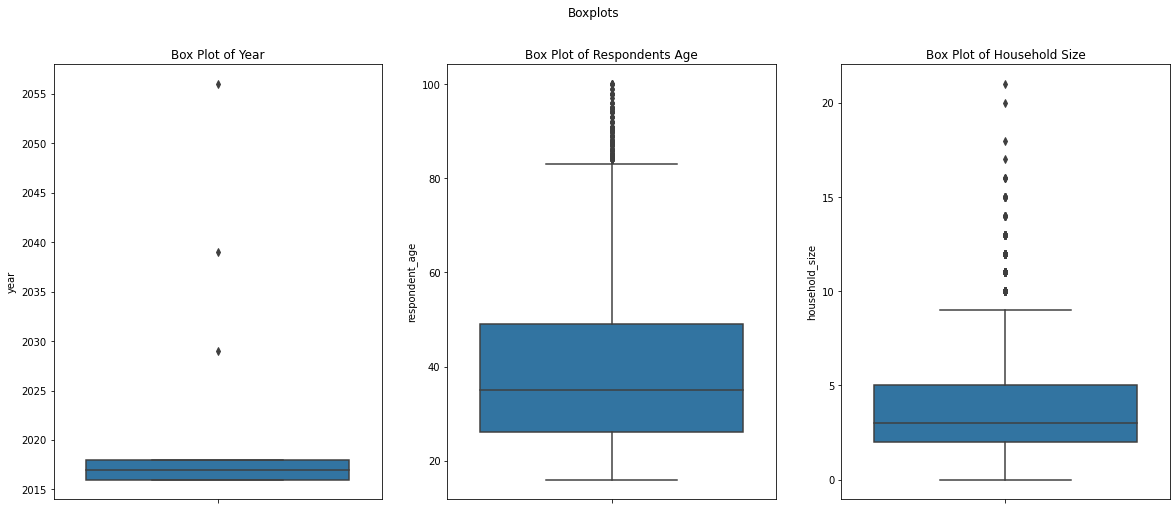

In [17]:
# Checking for Outliers

fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=bank, y = "year", ax=ax[0])
ax[0].set_title('Box Plot of Year')
sns.boxplot(data=bank, y = "respondent_age", ax=ax[1])
ax[1].set_title('Box Plot of Respondents Age')
sns.boxplot(data=bank, y = "household_size", ax=ax[2])
ax[2].set_title('Box Plot of Household Size')

plt.show()

# Outleirs present in all three variables.

In [18]:
# Identify the exact outliers in the 'respondent age

outliers = []

def detect_outlier(data):
  threshold=3
  mean_1=np.mean(data)
  std_1=np.std(data)

  for y in data:
    z_score=(y-mean_1)/std_1
    if np.abs(z_score)>threshold:
      outliers.append(y)
  return outliers
detect_outlier(bank['respondent_age'])

# they are in ages 89 - 100 are outliers.

[95.0,
 95.0,
 95.0,
 93.0,
 90.0,
 89.0,
 95.0,
 94.0,
 95.0,
 93.0,
 90.0,
 92.0,
 92.0,
 90.0,
 90.0,
 90.0,
 91.0,
 93.0,
 95.0,
 90.0,
 89.0,
 89.0,
 95.0,
 90.0,
 89.0,
 89.0,
 89.0,
 90.0,
 95.0,
 93.0,
 92.0,
 95.0,
 94.0,
 92.0,
 95.0,
 90.0,
 95.0,
 95.0,
 89.0,
 95.0,
 98.0,
 95.0,
 97.0,
 92.0,
 89.0,
 92.0,
 89.0,
 96.0,
 89.0,
 99.0,
 89.0,
 94.0,
 91.0,
 91.0,
 90.0,
 89.0,
 89.0,
 90.0,
 95.0,
 89.0,
 90.0,
 96.0,
 100.0,
 90.0,
 90.0,
 89.0,
 98.0,
 91.0,
 92.0,
 95.0,
 89.0,
 94.0,
 99.0,
 90.0,
 90.0,
 90.0,
 90.0,
 90.0,
 100.0,
 95.0,
 91.0,
 90.0,
 95.0,
 94.0,
 90.0,
 98.0,
 98.0,
 100.0,
 100.0,
 90.0,
 90.0,
 100.0,
 90.0,
 90.0,
 96.0,
 90.0,
 90.0,
 98.0,
 95.0,
 98.0,
 90.0]

## Anomalies

In [19]:
# Checking for Anomalies
# 'year' variable

q1_year = bank['year'].quantile(.25)
q3_year = bank['year'].quantile(.75)

iqr_year = q3_year - q1_year

# 'respondent_age' variable
q1_age = bank['respondent_age'].quantile(.25)
q3_age = bank['respondent_age'].quantile(.75)

iqr_age = q3_age - q1_age

# 'household_size' variable
q1_size = bank['household_size'].quantile(.25)
q3_size = bank['household_size'].quantile(.75)

iqr_size = q3_size - q1_size

print(iqr_year, iqr_age, iqr_size) 



2.0 23.0 3.0


## Missing Data

In [20]:
# Checking whether we have any missing data in the dataframe


np.count_nonzero(bank.isnull())
bank.isnull().sum()

country                   14
year                       0
uniqueid                   0
has_a_bank_account        36
location_type             15
has_a_cell_phone          11
household_size            28
respondent_age            34
respondent_gender         34
relationship_with_head     4
marital_status            32
education_level           29
occupation                30
dtype: int64

In [21]:
# Dealing with missing data
# country is not categorical data like the rest of null values so we check what the data looks like for the records where 'country' variable is null

bank[bank['country'].isna()]

# From results we can replace the country variable from Null to Tanzania

bank["country"].fillna("Tanzania", inplace = True)

In [22]:
# Verifying that the 'country' variable no longer has null values
bank.isnull().sum()

country                    0
year                       0
uniqueid                   0
has_a_bank_account        36
location_type             15
has_a_cell_phone          11
household_size            28
respondent_age            34
respondent_gender         34
relationship_with_head     4
marital_status            32
education_level           29
occupation                30
dtype: int64

In [23]:
# The rest are categorical data that isn't easy to predict therefore we can drop all remaining null values

bank.dropna(inplace=True)
bank.reset_index(drop=True, inplace=True)
bank

,country,year,uniqueid,has_a_bank_account,location_type,has_a_cell_phone,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,education_level,occupation
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23352,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23353,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23354,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23355,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [24]:
# Confirming that there are no nulls anymore after the drop

bank.isnull().sum()

country                   0
year                      0
uniqueid                  0
has_a_bank_account        0
location_type             0
has_a_cell_phone          0
household_size            0
respondent_age            0
respondent_gender         0
relationship_with_head    0
marital_status            0
education_level           0
occupation                0
dtype: int64

# Exploratory Analysis

## Univariate Analysis

### Visualizations

In [25]:
# Ploting the univariate summaries and recording our observations
# To show how many times each level of education exists in the dataset we plot a frequecy table.

bank.education_level.value_counts()

Primary education                  12694
No formal education                 4474
Secondary education                 4209
Tertiary education                  1144
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: education_level, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


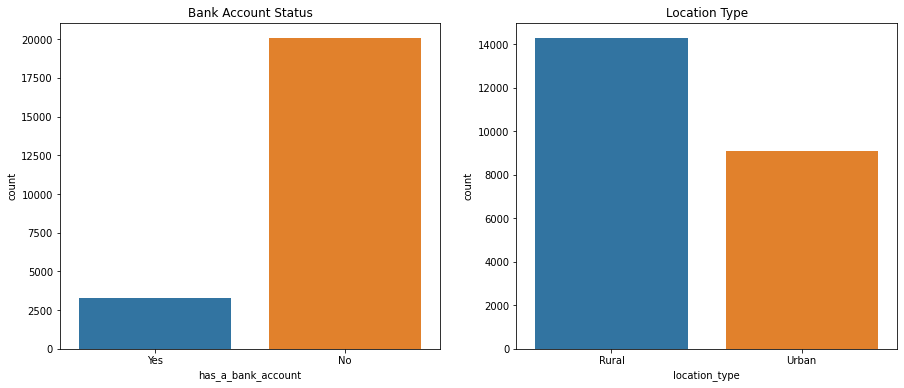

In [28]:
# We can plot various bar charts to help visualize the statistics

fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot('has_a_bank_account',data=bank,ax=ax[0])
ax[0].set_title('Bank Account Status')
sns.countplot('location_type',data=bank,ax=ax[1])
ax[1].set_title('Location Type')

plt.show()

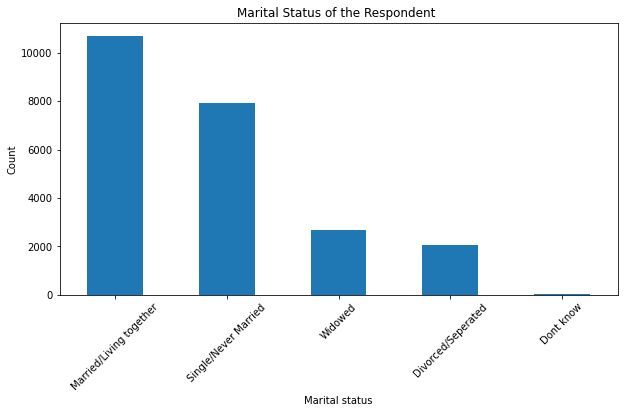

In [29]:
# Bar chart for 'marital status' variable

bank['marital_status'].value_counts().plot.bar(rot =0,figsize=(10,5))
plt.xlabel("Marital status")
plt.ylabel("Count")
plt.title("Marital Status of the Respondent ")
plt.xticks(rotation = 45)
plt.show()

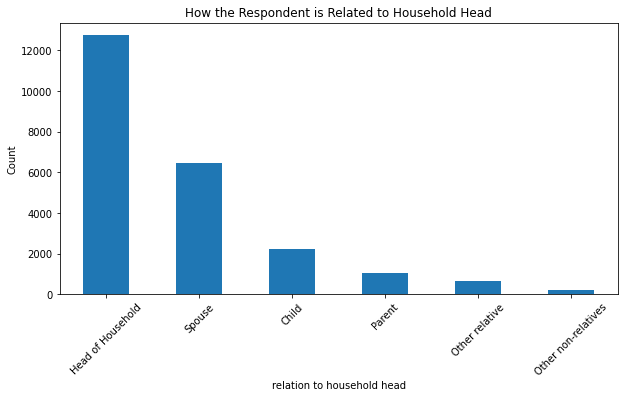

In [30]:
# Bar chart for 'relation to household head' variable
bank['relationship_with_head'].value_counts().plot.bar(rot =0,figsize=(10,5))
plt.xlabel("relation to household head")
plt.ylabel("Count")
plt.title("How the Respondent is Related to Household Head")
plt.xticks(rotation = 45)
plt.show()

### Measures of Central Tendency

In [32]:
# We can check the mean, mode and median of ages in the dataset
mean_age = bank['respondent_age'].mean()
median_age = bank['respondent_age'].median()
mode_age = bank['respondent_age'].mode()
print(mean_age, median_age, mode_age)

# Mean age is 38, median age is 35 and mode age is 30

38.80532602645888 35.0 0    30.0
dtype: float64


In [33]:
# Checking the mean, mode and median of hosehold sizes in the dataset
mean_hsize = bank['household_size'].mean()
median_hsize = bank['household_size'].median()
mode_hsize = bank['household_size'].mode()
print(mean_hsize, median_hsize, mode_hsize)

# The mean is 3 median is 3 and mode is 2.

3.687588303292375 3.0 0    2.0
dtype: float64


### Measures of Dispersion

In [34]:
# Checking the various measures of dispersion for the age variable
# standard deviation, variance, range, interquatile range, skewness and kurtosis

age_std = bank['respondent_age'].std()
age_var = bank['respondent_age'].var()

age_max = bank['respondent_age'].max()
age_min = bank['respondent_age'].min()
age_range = age_max - age_min

age_skew = bank['respondent_age'].skew()
age_kurt = bank['respondent_age'].kurt()

print('Standard Deviation of Age variable is ' + str(age_std))
print('Variance of Age variable is ' + str(age_var))
print('Range of Age variable is ' + str(age_range))
print('Skewness of Age variable is ' + str(age_skew))
print('Kurtosis of Age variable is ' + str(age_kurt))


Standard Deviation of Age variable is 16.521527131910133
Variance of Age variable is 272.96085877044266
Range of Age variable is 84.0
Skewness of Age variable is 0.8403528775777741
Kurtosis of Age variable is 0.09719678738690396


In [35]:
# Summary of statistics for age attribute

bank['respondent_age'].describe()

count    23357.000000
mean        38.805326
std         16.521527
min         16.000000
25%         26.000000
50%         35.000000
75%         49.000000
max        100.000000
Name: respondent_age, dtype: float64

In [36]:
# Checking the various measures of dispersion for the household size variable
# standard deviation, variance, range, interquatile range, skewness and kurtosis

hsize_std = bank['household_size'].std()
hsize_var = bank['household_size'].var()

hsize_max = bank['household_size'].max()
hsize_min = bank['household_size'].min()
hsize_range = hsize_max - hsize_min

hsize_skew = bank['household_size'].skew()
hsize_kurt = bank['household_size'].kurt()

print('Standard Deviation of Household Size variable is ' + str(hsize_std))
print('Variance of Household Size variable is ' + str(hsize_var))
print('Range of Household Size variable is ' + str(hsize_range))
print('Skewness of Household Size variable is ' + str(hsize_skew))
print('Kurtosis of Household Size variable is ' + str(hsize_kurt))

Standard Deviation of Household Size variable is 2.2809903775845206
Variance of Household Size variable is 5.202917102633174
Range of Household Size variable is 21.0
Skewness of Household Size variable is 0.9747175002958918
Kurtosis of Household Size variable is 1.1550663154603718


In [37]:
# Summary of statistics for household size attribute

bank['household_size'].describe()

count    23357.000000
mean         3.687588
std          2.280990
min          0.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         21.000000
Name: household_size, dtype: float64

## Bivariate Analysis

> In this analysis, we will check the relationship between bank account status and other variables. This is going to help us compare the variables to having a bank account.

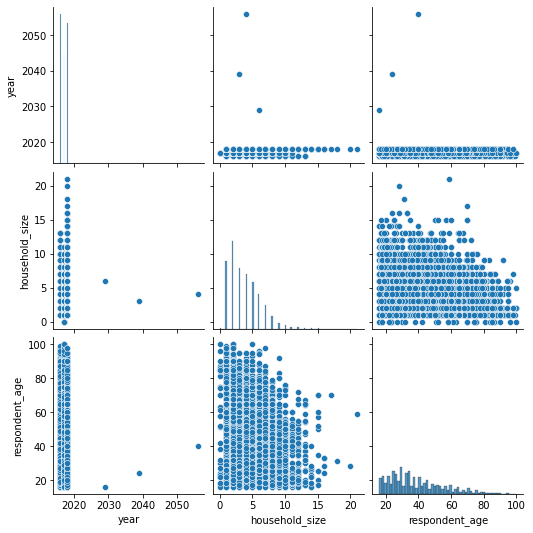

In [38]:
# Ploting the bivariate summaries.

sns.pairplot(bank)
plt.show()

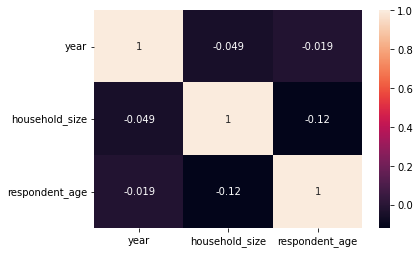

In [39]:
# Plotting the Pearson correlation coefficient
# There is no correlation coefficients for the coefficints are almost zero.

sns.heatmap(bank.corr(),annot=True)
plt.show()

In [42]:
# We can compare has bank accounts to having cell phones 

pd.crosstab([bank.has_a_cell_phone,bank.has_a_bank_account]
            ,bank.marital_status,margins=True).style.background_gradient(cmap='Pastel1_r')

#Individuals who have cell phones are likely to have have bank accounts compared to those who don't have cell phones.


In [41]:
# We can compare has a bank account to gender and locations in urban and rurals.
pd.crosstab([bank.respondent_gender,bank.has_a_bank_account]
            ,bank.location_type,margins=True).style.background_gradient(cmap='Pastel1_r')

# There are more men with bank accounts compared to women
# Females in urban areas have bank accounts compared to rural areas.
# Males in rural areas have bank accounts compared to urban areas.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


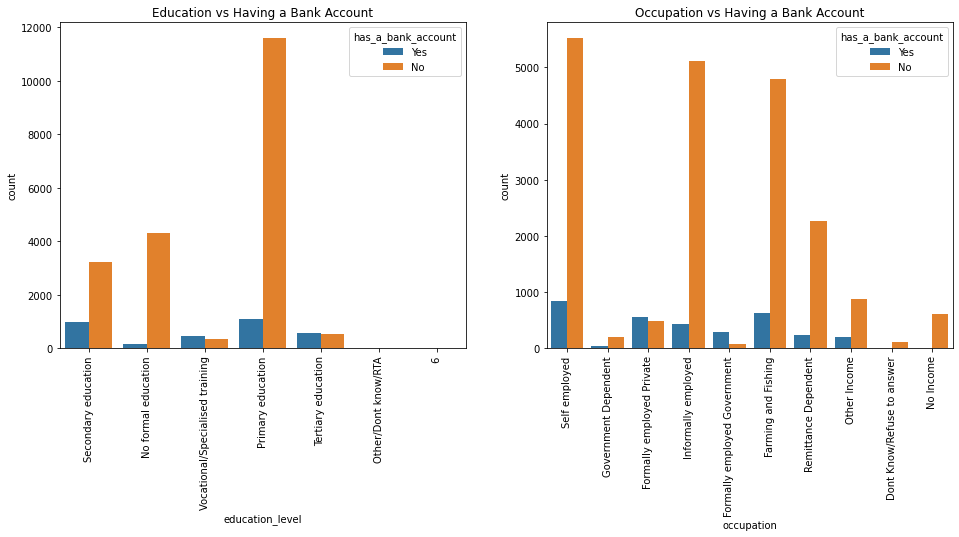

In [43]:
# Comparing education level and occupation vs having a bank account


fig,ax=plt.subplots(1,2,figsize=(16,6))

sns.countplot('education_level',hue='has_a_bank_account',data=bank,ax=ax[0])
ax[0].set_title('Education vs Having a Bank Account')


sns.countplot('occupation',hue='has_a_bank_account',data=bank,ax=ax[1])
ax[1].set_title('Occupation vs Having a Bank Account')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


plt.show()

In [44]:
# Changing some categorical attributes to numeric to summurise correlation of having accounts or not.

encode = {"has_a_bank_account": {"Yes":1, "No":0}, "respondent_gender": {"Male":1, "Female":0},
          "has_a_cell_phone":{"Yes":1,"No":0}, "location_type": {"Rural":1, "Urban":0},
          "education_level":{"No formal education":0,"Primary education":1, "Secondary education":2,
                              "Vocational/Specialised training":3,"Tertiary education":4, "Other/Dont know/RTA":5},
          "relationship_with_head":{"Head of Household":0, "Child":1, "Parent":2,
                            "Spouse":3, "Other relative":4, "Other non-relatives":5}, 
          "marital_status":{"Married/Living together":0, "Single/Never Married":1, "Divorced/Seperated":2,
                            "Widowed":3, "Dont know":4}}


In [45]:
bank.replace(encode, inplace = True)
bank.head()

,country,year,uniqueid,has_a_bank_account,location_type,has_a_cell_phone,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,education_level,occupation
0,Kenya,2018,uniqueid_1,1,1,1,3.0,24.0,0,3,0,2,Self employed
1,Kenya,2018,uniqueid_2,0,1,0,5.0,70.0,0,0,3,0,Government Dependent
2,Kenya,2018,uniqueid_3,1,0,1,5.0,26.0,1,4,1,3,Self employed
3,Kenya,2018,uniqueid_4,0,1,1,5.0,34.0,0,0,0,1,Formally employed Private
4,Kenya,2018,uniqueid_5,0,0,0,8.0,26.0,1,1,1,1,Informally employed


In [46]:
# Summary of correlations
# bank account status

bank['location_type'].corr(bank['has_a_bank_account'])


-0.08849280626186377

In [47]:
bank['has_a_cell_phone'].corr(bank['has_a_bank_account'])

0.20957156872677984

In [48]:
bank['household_size'].corr(bank['has_a_bank_account'])

-0.022856244820033532

In [49]:
bank['respondent_gender'].corr(bank['has_a_bank_account'])

0.11617726823081483

## Multivariate Analysis

In [50]:
bank.head()

,country,year,uniqueid,has_a_bank_account,location_type,has_a_cell_phone,household_size,respondent_age,respondent_gender,relationship_with_head,marital_status,education_level,occupation
0,Kenya,2018,uniqueid_1,1,1,1,3.0,24.0,0,3,0,2,Self employed
1,Kenya,2018,uniqueid_2,0,1,0,5.0,70.0,0,0,3,0,Government Dependent
2,Kenya,2018,uniqueid_3,1,0,1,5.0,26.0,1,4,1,3,Self employed
3,Kenya,2018,uniqueid_4,0,1,1,5.0,34.0,0,0,0,1,Formally employed Private
4,Kenya,2018,uniqueid_5,0,0,0,8.0,26.0,1,1,1,1,Informally employed


In [51]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23357 entries, 0 to 23356
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23357 non-null  object 
 1   year                    23357 non-null  int64  
 2   uniqueid                23357 non-null  object 
 3   has_a_bank_account      23357 non-null  int64  
 4   location_type           23357 non-null  int64  
 5   has_a_cell_phone        23357 non-null  int64  
 6   household_size          23357 non-null  float64
 7   respondent_age          23357 non-null  float64
 8   respondent_gender       23357 non-null  int64  
 9   relationship_with_head  23357 non-null  int64  
 10  marital_status          23357 non-null  int64  
 11  education_level         23357 non-null  object 
 12  occupation              23357 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 2.3+ MB


In [52]:


bank['education_level'] = bank['education_level'].astype(str).astype(int)
bank['relationship_with_head'] = bank['relationship_with_head'].astype(str).astype(int)
bank['marital_status'] = bank['marital_status'].astype(str).astype(int)

In [53]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23357 entries, 0 to 23356
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23357 non-null  object 
 1   year                    23357 non-null  int64  
 2   uniqueid                23357 non-null  object 
 3   has_a_bank_account      23357 non-null  int64  
 4   location_type           23357 non-null  int64  
 5   has_a_cell_phone        23357 non-null  int64  
 6   household_size          23357 non-null  float64
 7   respondent_age          23357 non-null  float64
 8   respondent_gender       23357 non-null  int64  
 9   relationship_with_head  23357 non-null  int64  
 10  marital_status          23357 non-null  int64  
 11  education_level         23357 non-null  int64  
 12  occupation              23357 non-null  object 
dtypes: float64(2), int64(8), object(3)
memory usage: 2.3+ MB


In [54]:
# Dropping unncessary columns

bank.drop(['country','year','uniqueid','occupation'],axis=1,inplace=True)

### Principal Component Analysis (PCA)

In [56]:
# Preprocessing,, divide the dataset into a feature set and corresponding labels. 
# store the feature sets into the X variable 
# and the series of corresponding labels in to the y variable

x = bank.drop('has_a_bank_account',1)
y = bank['has_a_bank_account']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


In [57]:
# Checking the x variable

x.shape


(23357, 8)

In [58]:
# Checking the y variable

y.shape


(23357,)

In [59]:
# Splitting the dataset into the Training set and Test set
# define the size of the test data as 20% of entire dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [60]:
# Normalization
 
# perform standard scalar normalization to normalize our feature set

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [61]:
# Applying PCA,, return all the features in the feature set for both the training and test sets
# since we have not specified the number of components in the constructor

from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [62]:
# Explained Variance Ratio ,,,check the variance caused by each of the principal components using the explained variance ratio

explained_variance = pca.explained_variance_ratio_
explained_variance

# The first principal component is responsible for 22.96% variance. 
# The second principal component causes 18.89% variance 
# Therefore (22.96 + 18.89) 41.85% is contained in the feature set that is captured by the first two principal components.


array([0.22964966, 0.18891222, 0.17105915, 0.11589348, 0.09358427,
       0.08020505, 0.07266411, 0.04803206])

In [63]:
# Using 1 Principal Component to train algorithm

from sklearn.decomposition import PCA

pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [64]:
# Training and Making Predictions using random forest classification

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [65]:
# Performance Evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# The random forest algorithm is able to correctly predict an 85.68% using one feature.

[[4003    0]
 [ 669    0]]
Accuracy 0.856806506849315


In [66]:
# Using 2 Principal Components to train algorithm and make predictions using random forest classification

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# The random forest algorithm is able to correctly predict an 85.68% using two features.

[[4003    0]
 [ 669    0]]
Accuracy 0.856806506849315


In [67]:
# Using 3 Principal Components to train algorithm and make predictions using random forest classification

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

pca = PCA(n_components=3)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# The random forest algorithm is able to correctly predict an 85.68% accuracy using three features.

[[4003    0]
 [ 669    0]]
Accuracy 0.856806506849315


### Factor Analysis

In [68]:
# Evaluate the “factorability” of our dataset.
# Condition,,,If Bartlett’s test turns out to be statistically insignificant, then we cannot use a factor analysis.

!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity


In [69]:
chi_square_value,p_value=calculate_bartlett_sphericity(bank)
chi_square_value, p_value

# In Bartlett ’s test, the p-value is 0. This shows the test was statistically insignificant, 
# This indicates that the observed correlation matrix is not an identity matrix.

(27196.41308499844, 0.0)

In [70]:
# The Kaiser-Meyer-Olkin (KMO) Test will determine the adequacy for each observed variable and for the complete model.

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(bank)

kmo_model


# The overall KMO for our data is 0.54, this shows the its inadequate therefore won't proceed with the analysis.

0.53665730844079

In [71]:
kmo_all

,KMO
has_a_bank_account,0.558779
location_type,0.554620
has_a_cell_phone,0.683453
household_size,0.626153
respondent_age,0.580340
respondent_gender,0.429381
relationship_with_head,0.480600
marital_status,0.535965
education_level,0.559482


### Discriminant Analysis

In [ ]:
# Dividing data into training and test sets

x = bank.iloc[:,1:].values
y = bank.iloc[:,0].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Feature Scaling 

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Performing LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components= 2)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

# Training and Making Predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test) 

# Evaluating Performance

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Linear discriminant, the algorithm achieved an accuracy of 86.52%, > 85.68% of the principal component.

# Conclusions

> The analysis we have just concluded shows.
Persons with cell phones are more likely to have bank accounts with increasing
cell phone users we can increase access to banks considerably.

Stretch more resources to remote areas to facilitate access to financial services to rural areas who has a significantly large difference of people without bank accounts.



# > Challenging the solution,

>*  Did we ask the right questions?
Certainly yes for or models did provide us with helpful insights.

